In [1]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt  
import csv
import datetime, time

from Arduino_device import ArduinoVISADevice, list_devices
# rm = pyvisa.ResourceManager("@py")
# ports = rm.list_resources()
# device = rm.open_resource("ASRL/dev/cu.usbmodem1101::INSTR", read_termination="\r\n", write_termination="\n")
# print(ports,device.query("*IDN?"))



3.09


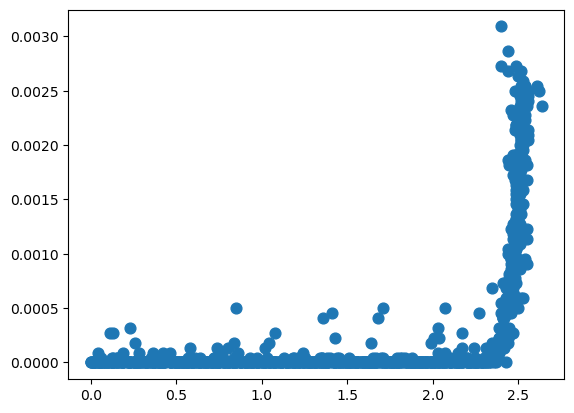

In [2]:
port = list_devices()

device = ArduinoVISADevice(port=port[2])
v1list,v2list=[],[]
output = device.set_output_value(channel=0,value=1000)
print(device.get_input_volt(channel=1))
for i in range(1024):
    output = device.set_output_value(channel=0,value=i)
    v1list.append(device.get_input_volt(channel=1))
    v2list.append(device.get_input_volt(channel=2))
plt.scatter(np.asarray(v1list)-np.asarray(v2list), np.asarray(v2list)/220., s=60)
plt.show()


In [49]:
from Particles import Particle

proton = Particle('proton', 1)
electron = Particle('electron', 0.5)
neutron = Particle('Neutron', 0)




error, spin not (-)1/2
None


a1
a2
a3
a4


In [11]:
def adc_to_volt(adc):
    return adc*3.3/1023


0.0